In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Image
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('/Users/ridhatullahaf/Desktop/모두 다 전부/Ajou Univ Doc 2022/Data Analytics Machine Learning Course/ML group project/dtrain.csv')
test = pd.read_csv('/Users/ridhatullahaf/Desktop/모두 다 전부/Ajou Univ Doc 2022/Data Analytics Machine Learning Course/ML group project/dtest.csv')

In [3]:
mix = pd.concat([train, test])

In [4]:
mix.describe()

employee_id  no_of_trainings           age  previous_year_rating  \
count  78298.000000     78298.000000  78298.000000          72362.000000   
mean   39149.500000         1.253378     34.797619              3.332219   
std    22602.830026         0.606766      7.665928              1.260982   
min        1.000000         1.000000     20.000000              1.000000   
25%    19575.250000         1.000000     29.000000              3.000000   
50%    39149.500000         1.000000     33.000000              3.000000   
75%    58723.750000         1.000000     39.000000              4.000000   
max    78298.000000        10.000000     60.000000              5.000000   

       length_of_service  KPIs_met >80%   awards_won?  avg_training_score  \
count       78298.000000   78298.000000  78298.000000        78298.000000   
mean            5.848974       0.354032      0.023053           63.349664   
std             4.248070       0.478222      0.150073           13.383664   
min             1.000000       0.000000      0.000000           39.000000   
25%             3.000000       0.000000      0.000000           51.000000   
50%             5.000000       0.000000      0.000000           60.000000   
75%             7.000000       1.000000      0.000000           76.000000   
max            37.000000       1.000000      1.000000           99.000000   

        is_promoted  
count  54808.000000  
mean       0.085170  
std        0.279137  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [5]:
train.head()
len(train)

54808

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
train = train.dropna() # drop every null values
len(train)

48660

In [8]:
train['previous_year_rating'] = train['previous_year_rating'].astype('int64') # change its type from float to integer
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48660 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   employee_id           48660 non-null  int64 
 1   department            48660 non-null  object
 2   region                48660 non-null  object
 3   education             48660 non-null  object
 4   gender                48660 non-null  object
 5   recruitment_channel   48660 non-null  object
 6   no_of_trainings       48660 non-null  int64 
 7   age                   48660 non-null  int64 
 8   previous_year_rating  48660 non-null  int64 
 9   length_of_service     48660 non-null  int64 
 10  KPIs_met >80%         48660 non-null  int64 
 11  awards_won?           48660 non-null  int64 
 12  avg_training_score    48660 non-null  int64 
 13  is_promoted           48660 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.6+ MB


In [9]:
from pandas import value_counts
promo = pd.DataFrame(train.is_promoted.value_counts())
promo.columns = ["Promoted"]
promo["Values"] = promo.index
promo["Values"] = promo["Values"].map({0:"Not Promoted", 1:"Promoted"})
fig = px.pie(promo, values= "Promoted", names = "Values", title = "Promoted Employess", color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_layout(
    autosize=False,
    width=1000,
    height=500)
fig.show()

In [10]:
depart = pd.DataFrame(train.department.value_counts())
depart.columns = ["Values"]
depart["Departments"] = depart.index
fig = px.bar(depart, x = "Departments", y= "Values", title = "Number of employees by department", color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_layout(
    autosize=False,
    width=850,
    height=650)
fig.show()

In [11]:
depart = pd.DataFrame(train.groupby("is_promoted").department.value_counts().reset_index(name='Values'))
for i in range(0,9):
    value = round(depart[depart["is_promoted"] == 1].iloc[i,2] / depart[depart["is_promoted"] == 0].iloc[i,2] * 100, 2)
    number = depart.iloc[i,1]
    print(f"Percentage of employees promoted in the department "+ str(number) + ": " + str(value) + "%")
depart["is_promoted"] = depart["is_promoted"].map({0:"Not Promoted", 1:"Promoted"})

Percentage of employees promoted in the department Sales & Marketing: 8.04%
Percentage of employees promoted in the department Operations: 10.23%
Percentage of employees promoted in the department Procurement: 11.59%
Percentage of employees promoted in the department Technology: 11.21%
Percentage of employees promoted in the department Analytics: 10.68%
Percentage of employees promoted in the department Finance: 8.93%
Percentage of employees promoted in the department HR: 5.99%
Percentage of employees promoted in the department R&D: 6.95%
Percentage of employees promoted in the department Legal: 5.09%


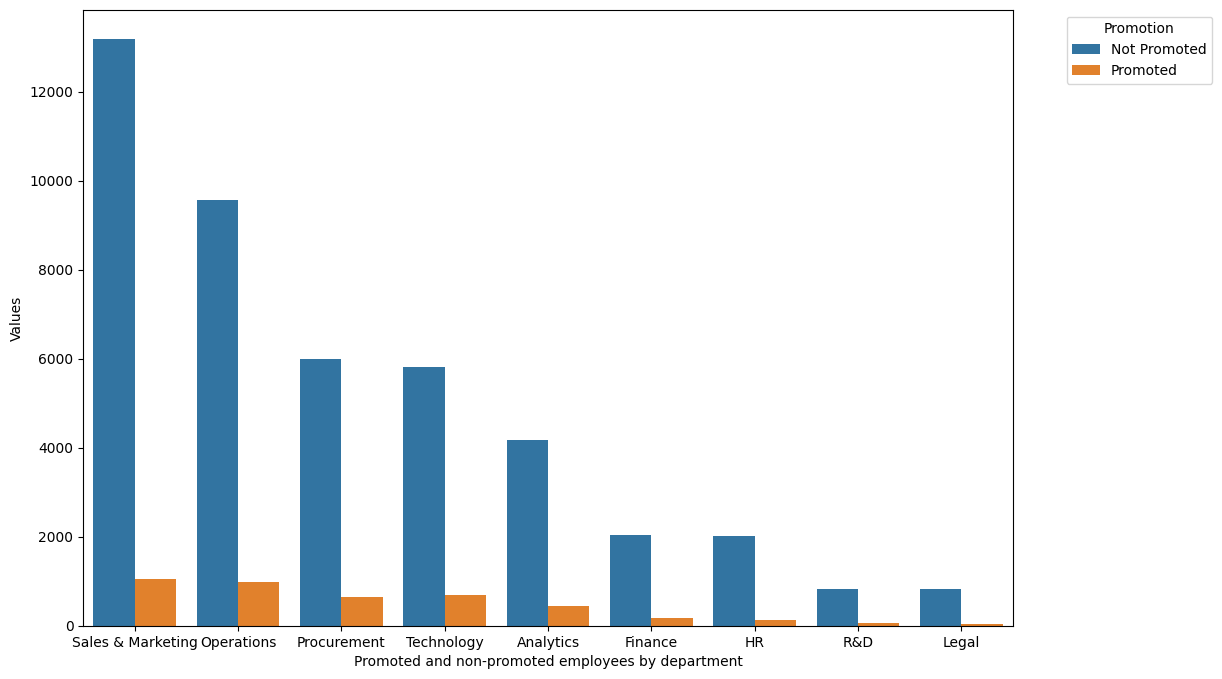

In [12]:
plt.figure(figsize=(12, 8))
sns.barplot(x= 'department', y='Values', data=depart, hue='is_promoted')
plt.legend(title='Promotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Promoted and non-promoted employees by department')
plt.show()

In [13]:
region = pd.DataFrame(train.region.value_counts())
region.columns = ["Regions"]
region["Values"] = region.index
fig = px.pie(region, values= "Regions", names = "Values", title = "Number of Employees by Region",color_discrete_sequence=px.colors.qualitative.Set2)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.update_layout(
    autosize=False,
    width=1000,
    height=500)
fig.show()
print("The employees of the organization provide from " + str(train.region.nunique()) + " different regions.")

The employees of the organization provide from 34 different regions.


In [14]:
edu = pd.DataFrame(train.groupby("is_promoted").education.value_counts().reset_index(name='Values'))
for i in range(0,3):
    value = round(edu[edu["is_promoted"] == 1].iloc[i,2] / edu[edu["is_promoted"] == 0].iloc[i,2] * 100, 2)
    number = edu.iloc[i,1]
    print(f"Percentage of Employees Promoted in the Department "+ str(number) + ": " + str(value) + "%")

edu["is_promoted"] = edu["is_promoted"].map({0:"Not Promoted", 1:"Promoted"})

Percentage of Employees Promoted in the Department Bachelor's: 8.91%
Percentage of Employees Promoted in the Department Master's & above: 10.97%
Percentage of Employees Promoted in the Department Below Secondary: 8.53%


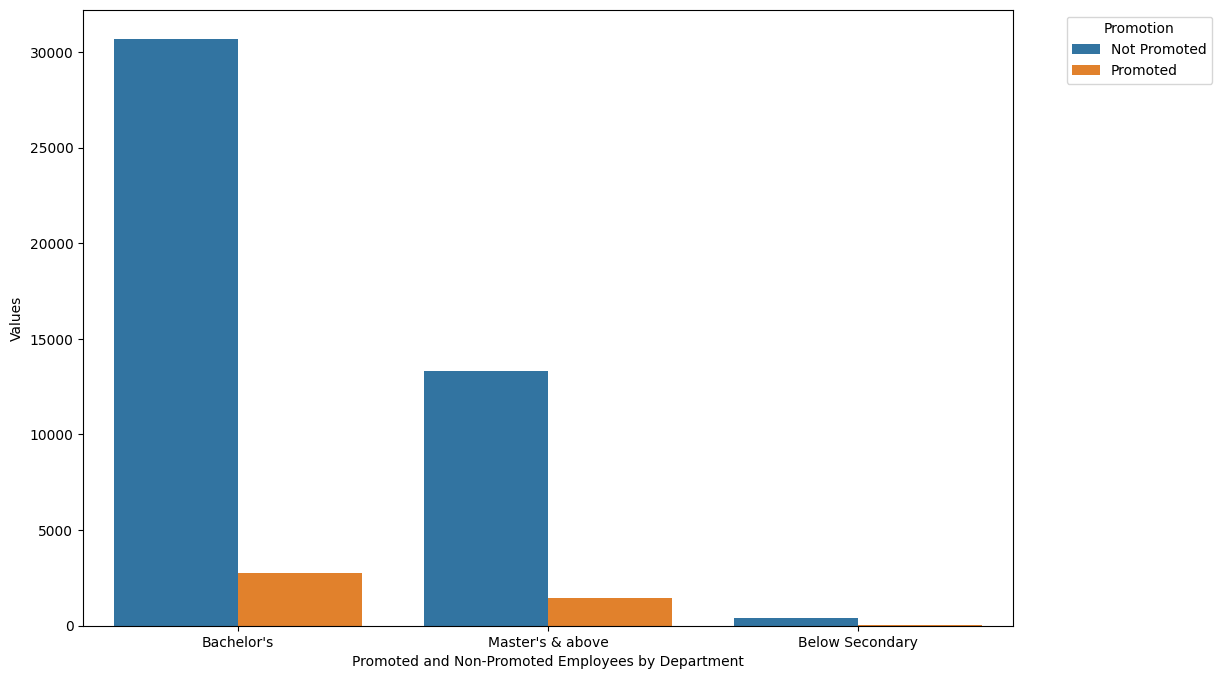

In [15]:
plt.figure(figsize=(12, 8))
sns.barplot(x='education', y='Values', data=edu, hue='is_promoted')
plt.legend(title='Promotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Promoted and Non-Promoted Employees by Department')
plt.show()

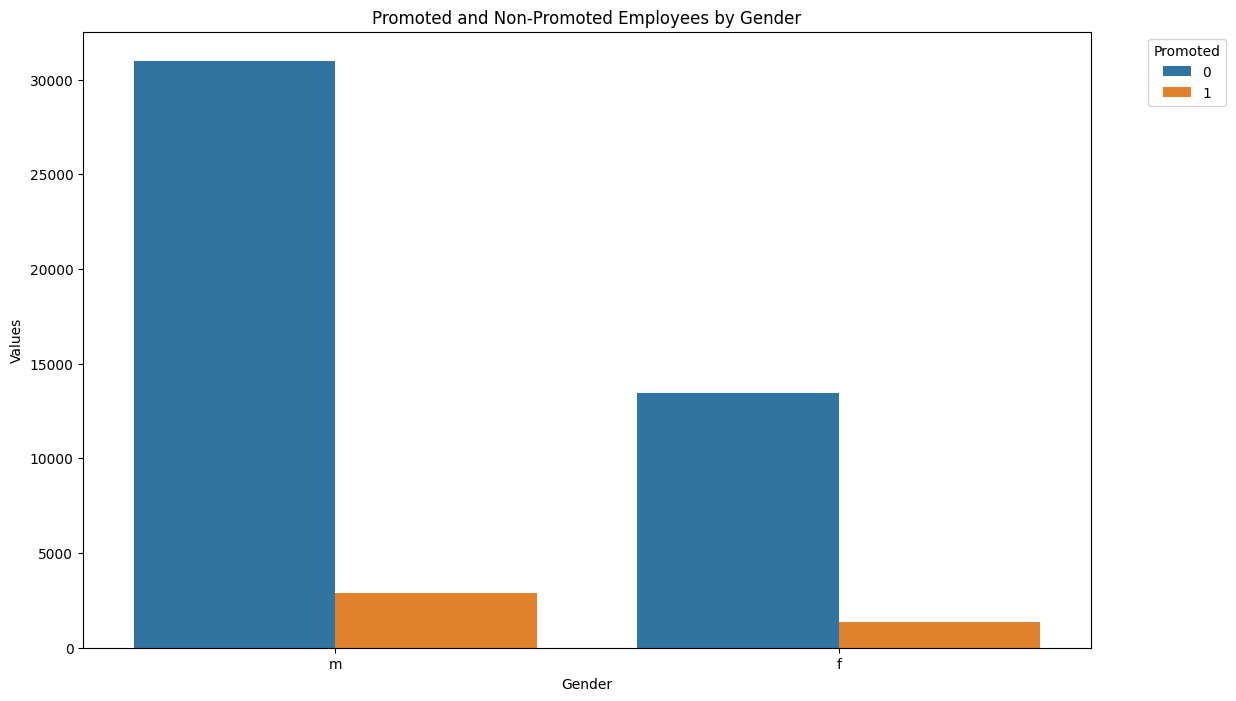

In [16]:
gender = pd.DataFrame(train.groupby("is_promoted").gender.value_counts().reset_index(name='Values'))
plt.figure(figsize=(13, 8))
sns.barplot(x='gender', y='Values', data=gender, hue='is_promoted')
plt.title("Promoted and Non-Promoted Employees by Gender")
plt.legend(title='Promoted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Gender')
plt.show()

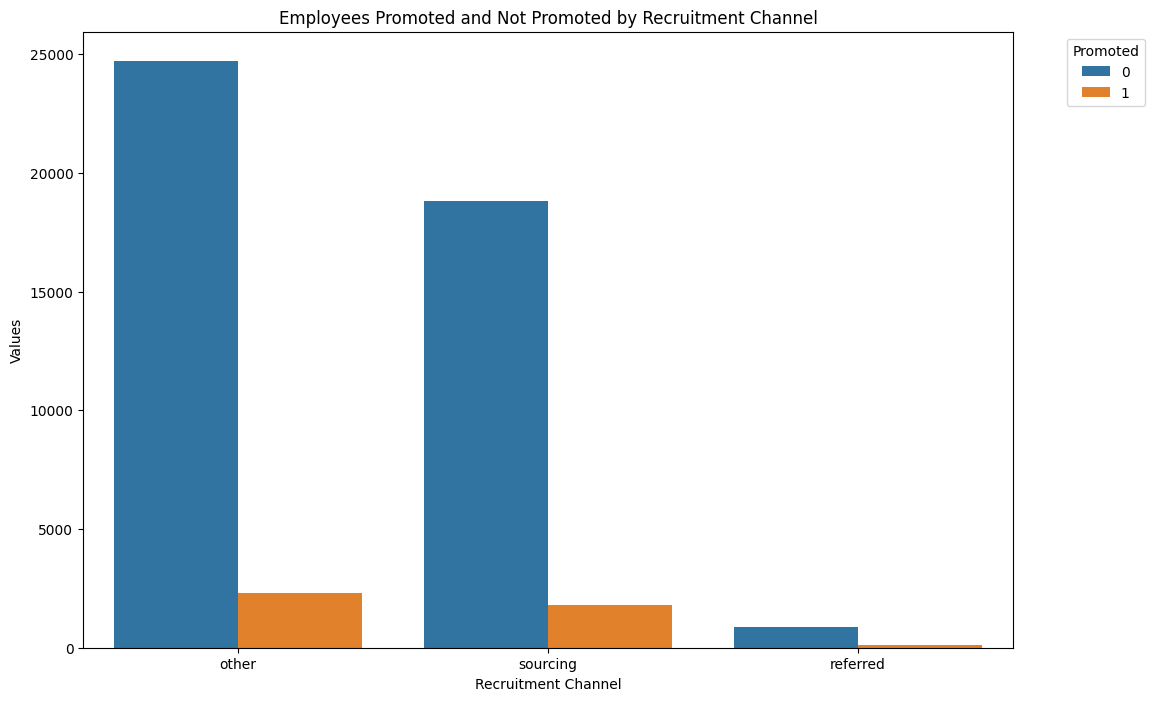

In [17]:
channel = pd.DataFrame(train.groupby("is_promoted").recruitment_channel.value_counts().reset_index(name='Values'))
plt.figure(figsize=(12, 8))
sns.barplot(x='recruitment_channel', y='Values', data=channel, hue='is_promoted')
plt.title("Employees Promoted and Not Promoted by Recruitment Channel")
plt.legend(title='Promoted', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Recruitment Channel')
plt.show()

Text(0.5, 0, 'Number of Trainings')

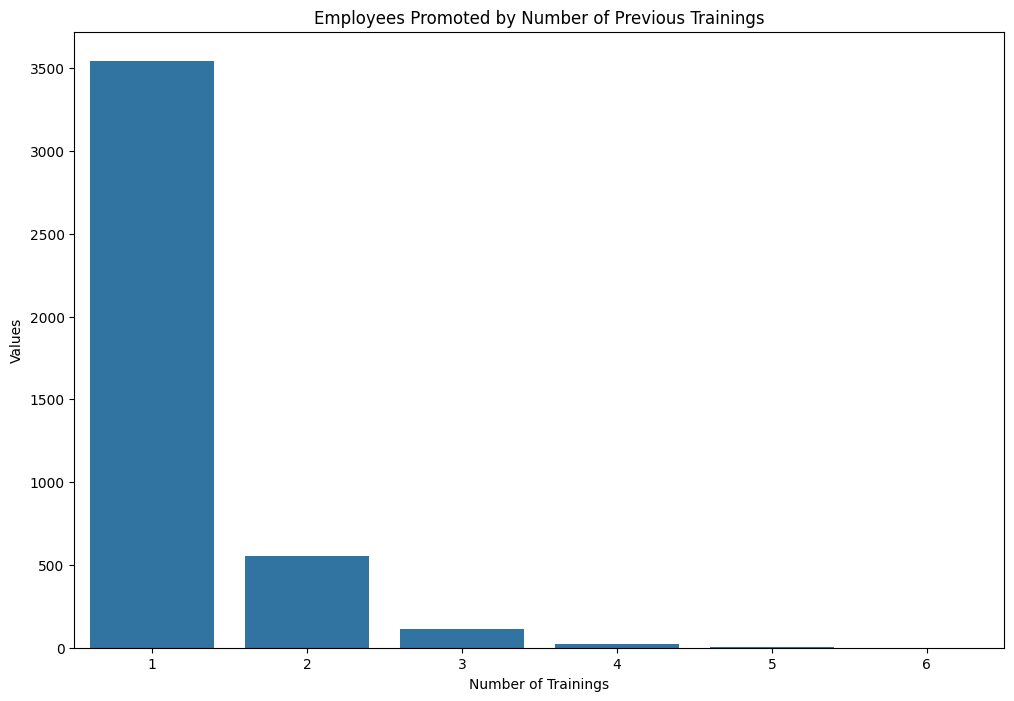

In [18]:
entertainment = pd.DataFrame(train.groupby("is_promoted").no_of_trainings.value_counts().reset_index(name='Values'))
promoted_entertainment = entertainment[entertainment["is_promoted"]==1]
plt.figure(figsize=(12, 8))
sns.barplot(data=promoted_entertainment, x="no_of_trainings", y="Values")
plt.title("Employees Promoted by Number of Previous Trainings")
plt.xlabel('Number of Trainings')

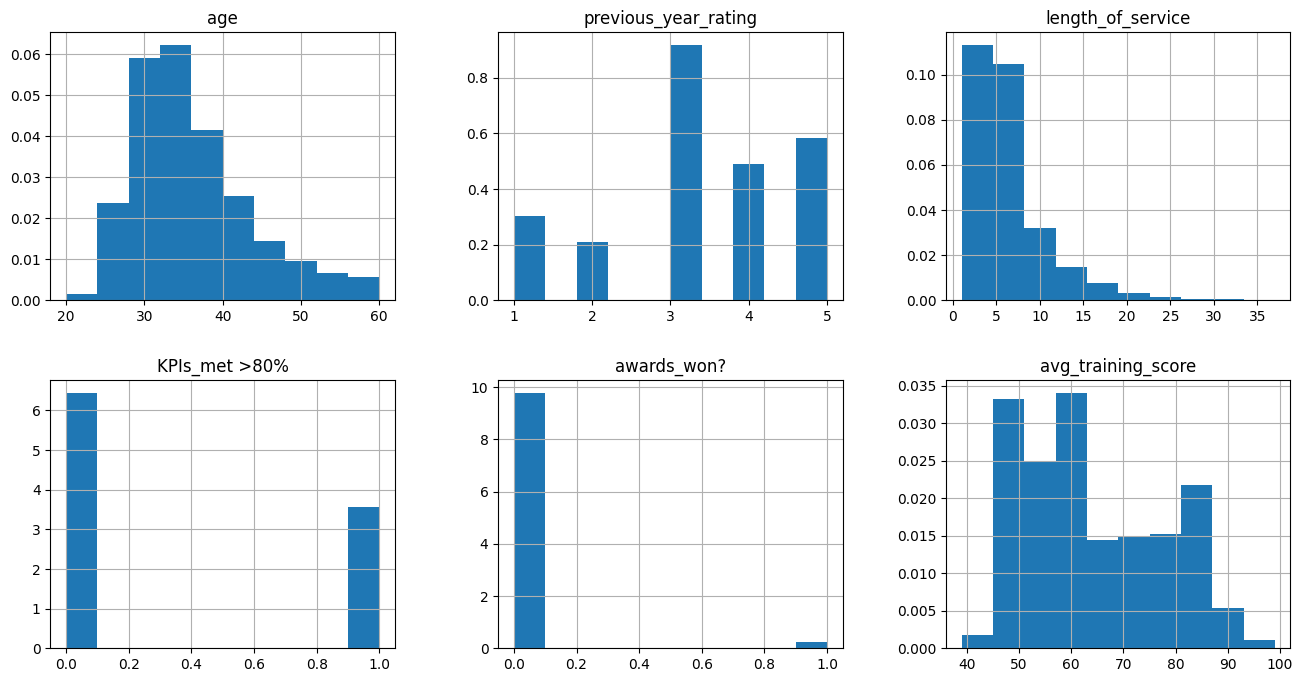

In [19]:
numerical = ["age", "previous_year_rating", "length_of_service","KPIs_met >80%","awards_won?","avg_training_score"]
train[numerical].hist(figsize=(16,8),layout=(2,3), density=True)
plt.show()

In [20]:
fig = px.histogram(train, x="age", title = "Employee Age Distribution", color = "is_promoted", labels= {"age":"age","is_promoted": "Promotion"},nbins=35, color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_layout(yaxis_title=" ")
fig.update_layout(
    autosize=False,
    width=900,
    height=650)
fig.show()
print("The average age of employees is " + str(round(np.mean(train.age),0)))
print("The median age of employees is " + str(np.median(train.age)))

The average age of employees is 36.0
The median age of employees is 34.0


In [21]:
fig = px.histogram(train, x="previous_year_rating", title = "Distribution of Employees' Prior Year Scores", color = "is_promoted", labels= {"previous_year_rating":"Scores","is_promoted": "Promotion"},nbins=35, color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_layout(yaxis_title=" ")
fig.update_layout(
    autosize=False,
    width=900,
    height=650)
fig.show()
print("The mean age of unpromoted employees is " + str(round(np.mean(train[train["is_promoted"]==0].previous_year_rating),2)))
print("The mean age of promoted employees is " + str(round(np.mean(train[train["is_promoted"]==1].previous_year_rating),2)))

The mean age of unpromoted employees is 3.28
The mean age of promoted employees is 3.98


In [22]:
fig = px.histogram(train, x="length_of_service", title = "Distribution of Number of Years of Service of Employees", color = "is_promoted", labels= {"length_of_service":"Years of service","is_promoted": "Promotion"},nbins=35, color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_layout(yaxis_title=" ")
fig.update_layout(
    autosize=False,
    width=900,
    height=650)
fig.show()
print("The mean years of service of unpromoted employees is " + str(round(np.mean(train[train["is_promoted"]==0].length_of_service),2)))
print("The mean years of service of promoted employees is " + str(round(np.mean(train[train["is_promoted"]==1].length_of_service),2)))

The mean years of service of unpromoted employees is 6.33
The mean years of service of promoted employees is 6.12


In [23]:
fig = px.histogram(train, x="KPIs_met >80%", title = "Distribution of Number of Employees who exceeded 80 of their KPIs", color = "is_promoted", labels= {"KPIs_met >80%":"KPI > 80","is_promoted": "Promotion"},nbins=35, color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_layout(yaxis_title=" ")
fig.update_layout(
    autosize=False,
    width=700,
    height=650)
fig.show()

In [24]:
kpi_no = round(len(train[(train["is_promoted"]==1) & (train["KPIs_met >80%"] == 0)]) / len(train[train["KPIs_met >80%"] == 0]) *100, 2)
kpi_yes = round(len(train[(train["is_promoted"]==1) & (train["KPIs_met >80%"] == 1)]) / len(train[train["KPIs_met >80%"] == 1]) *100, 2)
print("The " + str(kpi_no) + "% employees who did not exceed 80% of their KPIs were promoted")
print( "The " + str(kpi_yes) + "% employees who did exceed 80% of their KPIs were promoted")

The 4.08% employees who did not exceed 80% of their KPIs were promoted
The 17.02% employees who did exceed 80% of their KPIs were promoted


In [25]:
fig = px.histogram(train, x="awards_won?", title = "Distribution of Number of Employees by Awards obtained", color = "is_promoted", labels= {"won_awards":"Prizes Obtained","is_promoted": "Promotion"},nbins=35, color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_layout(yaxis_title=" ")
fig.update_layout(
    autosize=False,
    width=700,
    height=650)
fig.show()

In [26]:
kpi_no = round(len(train[(train["is_promoted"]==1) & (train["awards_won?"] == 0)]) / len(train[train["awards_won?"] == 0]) *100, 2)
kpi_yes = round(len(train[(train["is_promoted"]==1) & (train["awards_won?"] == 1)]) / len(train[train["awards_won?"] == 1]) * 100, 2)
print("The " + str(kpi_no) + "% of employees who did not earn awards were promoted")
print("The " + str(kpi_yes) + "% of employees who did obtain awards were promoted")

The 7.84% of employees who did not earn awards were promoted
The 44.76% of employees who did obtain awards were promoted


In [27]:
fig = px.histogram(train, x="avg_training_score", title = "Distribution of Number of Years of Service of Employees", color = "is_promoted", labels= {"avg_training_score":"Average Training Score","is_promoted": "Promotion"},nbins=35, color_discrete_sequence=px.colors.qualitative.Pastel2)
fig.update_layout(yaxis_title=" ")
fig.update_layout(
    autosize=False,
    width=900,
    height=650)
fig.show()
print("The mean years of service of unpromoted employees is " + str(round(np.mean(train[train["is_promoted"]==0].avg_training_score),2)))
print("The mean years of service of promoted employees is " + str(round(np.mean(train[train["is_promoted"]==1].avg_training_score),2)))


The mean years of service of unpromoted employees is 62.87
The mean years of service of promoted employees is 71.32


In [28]:
train.drop(["employee_id", "region"], axis=1, inplace=True)

In [29]:
train.department = train.department.map({"Sales & Marketing":0,
                 "Operations":1,
                 "Technology":2,
                 "Analytics":3,
                 "R&D":4,
                 "Procurement":5,
                 "Finance":6,
                 "HR":7,
                 "Legal":8})
train.education = train.education.map({"Master's & above":0,
                                "Bachelor's":1,
                                "Below Secondary":2})
train.gender = train.gender.map({"f":0,
                          "m":1})
train.recruitment_channel = train.recruitment_channel.map({"sourcing":0,
                                                    "other":1,
                                                    "referred":2})
train.head()

department  education  gender  recruitment_channel  no_of_trainings  age  \
0           0          0       0                    0                1   35   
1           1          1       1                    1                1   30   
2           0          1       1                    0                1   34   
3           0          1       1                    1                2   39   
4           2          1       1                    1                1   45   

   previous_year_rating  length_of_service  KPIs_met >80%  awards_won?  \
0                     5                  8              1            0   
1                     5                  4              0            0   
2                     3                  7              0            0   
3                     1                 10              0            0   
4                     3                  2              0            0   

   avg_training_score  is_promoted  
0                  49            0  
1                  60            0  
2                  50            0  
3                  50            0  
4                  73            0

In [30]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, StratifiedKFold, RandomizedSearchCV
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score),
            'roc_auc':make_scorer(roc_auc_score)}

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier()
gnb_model = GaussianNB()
xgb_model = XGBClassifier()

features = train.drop('is_promoted', axis=1).to_numpy()
target = train['is_promoted'].to_numpy()

In [34]:
def models_evaluation(X, y, folds):
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)
    xgb = cross_validate(xgb_model, X, y, cv=folds, scoring=scoring)

    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean(),
                                                              log['test_roc_auc'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean(),
                                                                  svc['test_roc_auc'].mean()],

                                                                  'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean(),
                                                      dtr['test_roc_auc'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean(),
                                                      rfc['test_roc_auc'].mean()],
                                       'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean(),
                                                             gnb['test_roc_auc'].mean()],
                                        
                                       'Extreme Gradient Boosting':[xgb['test_accuracy'].mean(),
                                                              xgb['test_precision'].mean(),
                                                              xgb['test_recall'].mean(),
                                                              xgb['test_f1_score'].mean(),
                                                            xgb['test_roc_auc'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score', "AUC ROC"])

    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)

    return(models_scores_table)
  
models_evaluation(features, target, 5)

Logistic Regression  Support Vector Classifier  Decision Tree  \
Accuracy              0.916482                   0.915187       0.894225   
Precision             0.668985                   0.666206       0.404496   
Recall                0.078688                   0.051275       0.458169   
F1 Score              0.140686                   0.095125       0.429615   
AUC ROC               0.537487                   0.524377       0.696965   

           Random Forest  Gaussian Naive Bayes  Extreme Gradient Boosting  \
Accuracy        0.931792              0.911344                   0.939971   
Precision       0.743648              0.464391                   0.884655   
Recall          0.329157              0.128066                   0.356092   
F1 Score        0.456311              0.200695                   0.507728   
AUC ROC         0.659176              0.557010                   0.675840   

                          Best Score  
Accuracy   Extreme Gradient Boosting  
Precision  Extreme Gradient Boosting  
Recall                 Decision Tree  
F1 Score   Extreme Gradient Boosting  
AUC ROC                Decision Tree

In [35]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [36]:
params = {
        'min_child_weight': [1,3, 5, 7, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.2, 0.4, 0.6, 0.8, 1.0],
        'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 1.0],
        'max_depth': [2, 3, 4, 5, 7,9]
        }

In [37]:
folds = 5
param_comb = 20
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 7)
random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=param_comb, scoring='f1',verbose = 3, n_jobs=4, cv=skf.split(features,target), random_state=7)
start_time = timer(None) 
random_search.fit(features, target)
timer(start_time)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 4/5] END colsample_bytree=0.2, gamma=1, max_depth=3, min_child_weight=1, subsample=0.2;, score=0.332 total time=   0.1s
[CV 1/5] END colsample_bytree=0.2, gamma=1, max_depth=3, min_child_weight=1, subsample=0.2;, score=0.317 total time=   0.1s
[CV 2/5] END colsample_bytree=0.2, gamma=1, max_depth=3, min_child_weight=1, subsample=0.2;, score=0.330 total time=   0.1s
[CV 3/5] END colsample_bytree=0.2, gamma=1, max_depth=3, min_child_weight=1, subsample=0.2;, score=0.296 total time=   0.1s
[CV 1/5] END colsample_bytree=0.4, gamma=2, max_depth=2, min_child_weight=10, subsample=0.2;, score=0.384 total time=   0.1s
[CV 2/5] END colsample_bytree=0.4, gamma=2, max_depth=2, min_child_weight=10, subsample=0.2;, score=0.369 total time=   0.1s
[CV 3/5] END colsample_bytree=0.4, gamma=2, max_depth=2, min_child_weight=10, subsample=0.2;, score=0.365 total time=   0.1s
[CV 5/5] END colsample_bytree=0.2, gamma=1, max_depth=3, min_child_

In [38]:
print('Optimal Parameters:')
print(random_search.best_params_)
print("\n Best F1 Score Obtained")
print(random_search.best_score_)

Optimal Parameters:
{'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 7, 'gamma': 0.5, 'colsample_bytree': 0.6}

 Best F1 Score Obtained
0.5106001145805141


In [39]:
test = test.copy() 

test.drop(["employee_id","region"],axis=1, inplace=True)

test.department = test.department.map({"Sales & Marketing":0,
                 "Operations":1,
                 "Technology":2,
                 "Analytics":3,
                 "R&D":4,
                 "Procurement":5,
                 "Finance":6,
                 "HR":7,
                 "Legal":8})
test.education = test.education.map({"Master's & above":0,
                                "Bachelor's":1,
                                "Below Secondary":2})
test.gender = test.gender.map({"f":0,
                          "m":1})
test.recruitment_channel = test.recruitment_channel.map({"sourcing":0,
                                                    "other":1,
                                                    "referred":2})

In [40]:
test.head()

department  education  gender  recruitment_channel  no_of_trainings  age  \
0           2        1.0       1                    0                1   24   
1           7        1.0       0                    1                1   31   
2           0        1.0       1                    1                1   31   
3           5        1.0       0                    1                3   31   
4           6        1.0       1                    0                1   30   

   previous_year_rating  length_of_service  KPIs_met >80%  awards_won?  \
0                   NaN                  1              1            0   
1                   3.0                  5              0            0   
2                   1.0                  4              0            0   
3                   2.0                  9              0            0   
4                   4.0                  7              0            0   

   avg_training_score  
0                  77  
1                  51  
2                  47  
3                  65  
4                  61

In [41]:
y_test = random_search.predict(test)
y_test_prob = random_search.predict_proba(test)
result = pd.DataFrame(data={'Promoted':y_test, "Probability":y_test_prob[:,1]})
print(result.head())
print("The number of Promoted Employees is: " + str(len(result[result["Promoted"]==1])))

   Promoted  Probability
0         0     0.078711
1         0     0.000369
2         0     0.000017
3         0     0.000454
4         0     0.002335
The number of Promoted Employees is: 807
